In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mne

In [2]:
import GetICCValues as iccValues
import dataFile as getData

In [3]:
REFERENCE_NAME = 'averageReference'
FEATURE_NAME = 'AbsolutePowerFeature'
FEATURE_LIST = getData.getFeatureList('AbsolutePowerFeature')
ELECTRODE_LIST = getData.getElectrodeList()
EPOCH_LIST = [4]
SUBJECT_LIST = ['sub1.bin', 'sub2.bin']

In [4]:
numFeature = len(FEATURE_LIST)
numElectrode = len(ELECTRODE_LIST)
numEpoch = len(EPOCH_LIST)

In [5]:
#epoch[featureList[electrodes]]]
iccValuesArr = iccValues.getICCValues(SUBJECT_LIST, FEATURE_NAME, REFERENCE_NAME, EPOCH_LIST)

In [9]:
iccValuesArr

array([[[ 2.54741559e-02,  3.62541990e-01,  1.16295493e-01,
          6.63350339e-02,  4.28775940e-01,  1.88111271e-02,
         -2.87262493e-03,  4.34548969e-01,  1.09524052e-01,
          6.49492594e-02,  1.99697427e-01, -5.04531826e-03,
          6.86385976e-01,  4.23594075e-01,  2.50669758e-01,
          8.06886235e-01,  3.35177380e-01,  5.83209805e-01,
          5.44612664e-01],
        [ 5.13573837e-01,  9.30210988e-02,  3.61467542e-01,
          1.45765022e-01,  5.02486839e-01,  3.63858470e-01,
          2.03389141e-01,  2.84600893e-01,  7.69506367e-02,
          4.75560443e-01,  5.36922096e-01,  3.17463762e-01,
          3.56643652e-01, -5.98141656e-03,  4.00810080e-05,
          2.67559577e-01,  2.03146000e-01,  5.39070380e-01,
          5.50872276e-01],
        [ 1.13758956e-01,  4.13177709e-03,  1.73823222e-02,
          4.37126716e-01,  6.35024351e-03,  1.07481658e-02,
         -5.62360257e-03,  5.12013062e-03,  4.39200646e-02,
          2.47732284e-01,  3.60841280e-01,  3.

In [10]:
mneInfo = mne.create_info(ch_names = ELECTRODE_LIST, ch_types = ['eeg'] * numElectrode, sfreq=250)
mneInfo.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>

TypeError: 'AxesSubplot' object is not subscriptable

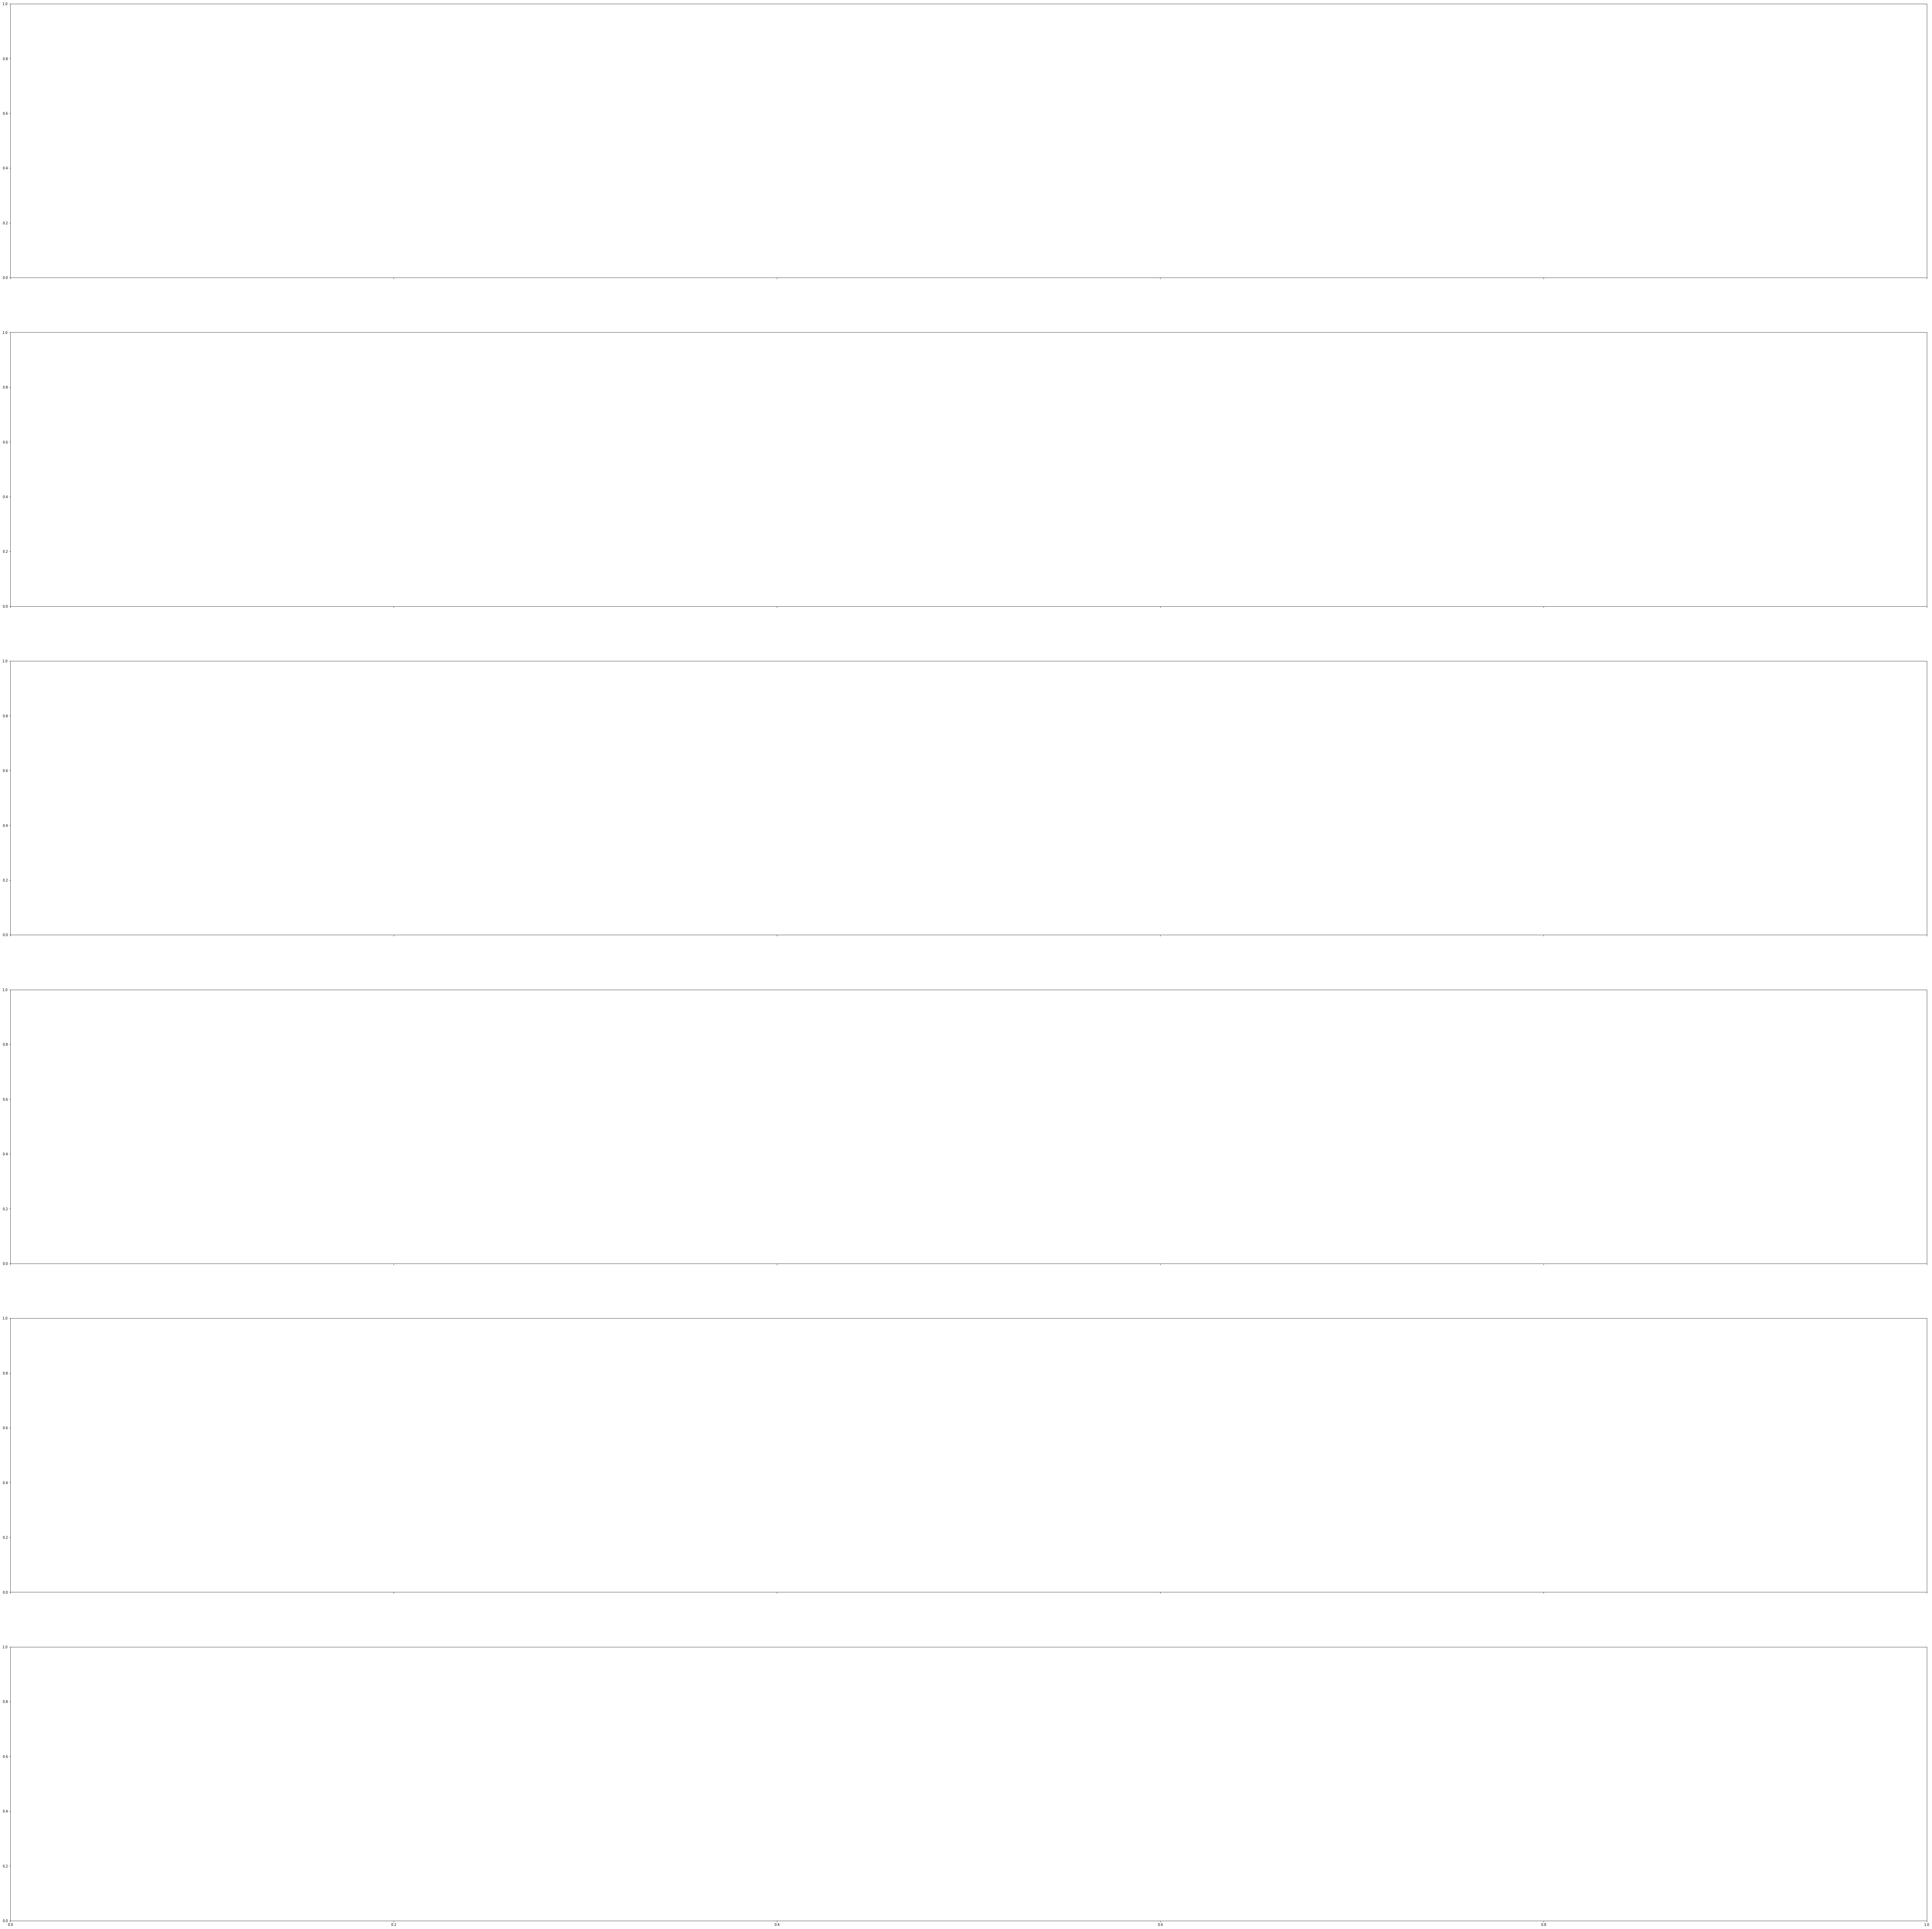

In [8]:
fig, ax = plt.subplots(ncols=numEpoch, nrows=numFeature, figsize=(100, 100), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

for epoch in range(0, numEpoch):
    epoch_num = EPOCH_LIST[epoch]
    for feature in range(0, numFeature):
        feature_name = FEATURE_LIST[feature]
        dataToPlot = iccValuesArr[epoch][feature]
        mne.viz.plot_topomap(dataToPlot, mneInfo, axes = ax[feature][epoch], show = False)
        ax[feature][epoch].set_title([feature_name, epoch_num], fontweight='bold', fontsize=64)